# Keras를 사용한 개발 과정
1. 입력 텐서(X)와 출력 텐서(y)로 이뤄진 훈련 데이터 정의
2. 입력과 출력을 연결하는 Layer(층)으로 이뤄진 네트워크(모델) 정의
    - Sequential 방식: 순서대로 쌓아올린 네트워크로 이뤄진 모델 생성하는 방식(복잡한 모델 만들 수 없음)
    - Functional API 방식: 다양한 구조의 네트워크로 이뤄진 모델 생성하는 방식
    - Subclass 방식: 네트워크를 정의하는 클래스 구현
    
3. 모델 컴파일
    - 모델이 Train(학습)할때, 사용할 손실함수(Loss Function), 최적화기법(Optimizer), 학습과정을 모니터링할 평가지표(Metrics) 설정
4. Training(훈련)
    - 모델의 fit() 메소드에 훈련데이터(X,y)를 넣어 Train
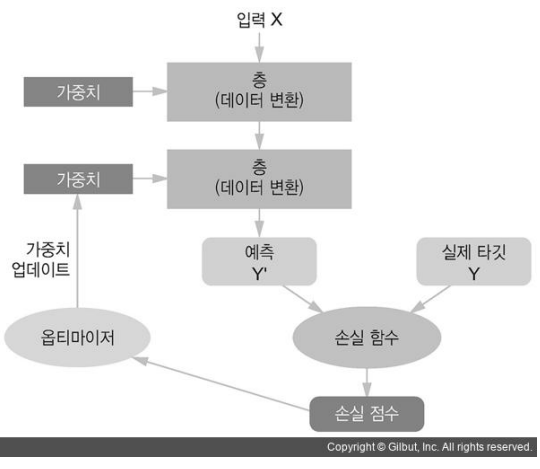

# MNIST 이미지 분류 
- ### [MNIST](https://ko.wikipedia.org/wiki/MNIST_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B2%A0%EC%9D%B4%EC%8A%A4)(Modified National Institute of Standards and Technology) database
- 흑백 손글씨 숫자 0-9까지 10개의 범주로 구분해놓은 데이터셋
- 하나의 이미지는 28 * 28 pixel 의 크기
- 6만개의 Train 이미지와 1만개의 Test 이미지로 구성됨.

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
# 텐서플로우 버전 확인
tf.__version__

'2.1.0'

In [3]:
keras.__version__

'2.2.4-tf'

In [4]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [5]:
type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [6]:
# 60000 - 이미지 개수, 28 - height, 28 - width)
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [7]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [8]:
# 첫번째 사진
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

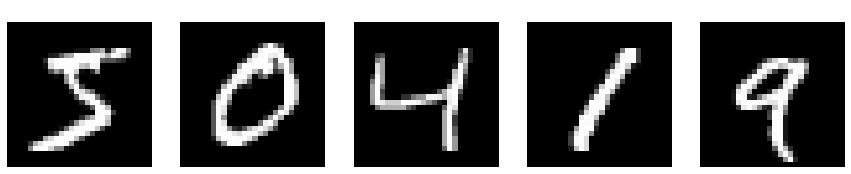

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 5))
# 5개 이미지 확인
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_train[i], cmap = 'gray')
    plt.title(y_train[i], color = 'w')
    plt.axis('off')

# plt.colorbar()    
plt.show()

## 신경망 구현

## network : 전체 모델 구조 만들기

In [10]:
# 모델 생성 - 모델 틀 만들어짐
model = keras.Sequential()
# 층(Layer) 도델에 추가 - 생성한 Input이라는 객체를 add해서 넣음(Input Layer: 입력층)
# Flatten이라는 객체를 add해서 넣음
# Dense 3가지를 쌓음 -> 그 이후 결과 나옴. 마지막에 쌓는 레이어 '출력층(Output Layer)'
# 입력층, 출력층 제외한 Layer는 은닉층('Hidden Layer')
# 딥러닝? LogisticRegression모델 n개 만드는 것. 입력값 들어오면 가중치 곱해 시그모이드 함수
# 256개 모델 생성, 128개 모델 생성 -> Layer 단위로 나누어서 모델 넣어줌
# 1개 모델? Unit, Node, Neuron. 뉴런 모아놓은 것이 Layer. Layer 모아농은 것이 네트워크
# actavtion - 시그모이드 함수 대신 렐루/소프트맥스 함수 사용
model.add(keras.layers.Input((28, 28)))  # 입력층
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation = 'relu'))
model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))  # 출력층 - 예측한 값 나옴. Dense = 10, 출력값 개수(0 ~ 9). softmax - 10개 수에 대한 각 확률값

In [11]:
# 모델 구조 보여줌
# Input은 어떤 값 받을지 선언해주는 것. Layer 아님
# Param: 학습시킬 파라미터의 개수
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [12]:
# 모델 구조 이미지로 보기 - 패키지 설치
!pip install pydot pydotplus graphviz

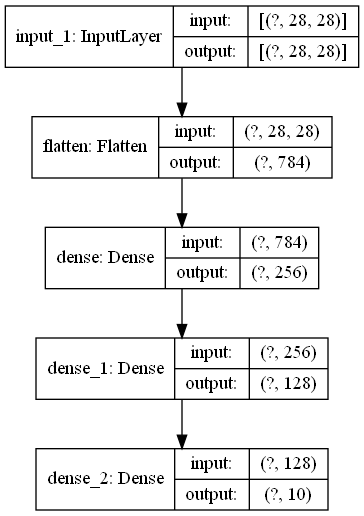

In [15]:
from tensorflow.keras.utils import plot_model
# plot_model(model)
# 파일로 저장
# plot_model(model, to_file = 'model.png')
plot_model(model, to_file = 'model.png', show_shapes = True)

## 컴파일 단계
- 구축된 모델에 추가 설정
    - 추가 설정: 어떻게 학습할지에 대한 설정
- 손실함수
- Optimizer(최적화 함수)
- 평가지표

In [19]:
# 키워드 인자로 지정
model.compile(optimizer = 'adam',  # Optimizer 등록
              loss = 'categorical_crossentropy',  # Loss Fuction 등록
              metrics = ['accuracy'])  # 평가지표 - Train 도중 validation 결과 확인

## 데이터 준비
- X
    - 0 ~ 1 사이의 값으로 정규화 
- y
    - one hot encoding 처리
    - tensorflow.keras 의 to_categorical() 함수 이용

In [20]:
X_train.min(), X_test.max()

(0, 255)

In [22]:
# Scaling
# 최소값, 최대값 정해져 있는 범위(0 ~ 255)
X_train = X_train/255
X_test = X_test/255

In [23]:
# 0 ~ 1 사이로 스케일링 됨
X_train.min(), X_train.max()

(0.0, 1.0)

In [25]:
# y값 원핫인코딩
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [26]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [27]:
y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [28]:
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

## 학습 (fit)


In [29]:
model.fit(X_train, y_train,
          epochs = 10,  # epoch: 전체 train dataset을 1번 학습 - 1 epoch
          batch_size = 100,  # 파라미터 업데이트(최적화)를 100개마다 처리. 한번에 100개씩 학습시키겠다 -> 100개하고 나서 오차 확인해 파라미터 업데이트
          validation_split = 0.2)  # 학습하는 도중에, 검증용 데이터셋 지정(20%)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 5s 94us/sample - loss: 0.2819 - accuracy: 0.9185 - val_loss: 0.1371 - val_accuracy: 0.9607
Epoch 2/10
48000/48000 [==============================] - 3s 72us/sample - loss: 0.1071 - accuracy: 0.9678 - val_loss: 0.1075 - val_accuracy: 0.9678
Epoch 3/10
48000/48000 [==============================] - 3s 71us/sample - loss: 0.0690 - accuracy: 0.9788 - val_loss: 0.0982 - val_accuracy: 0.9694
Epoch 4/10
48000/48000 [==============================] - 3s 71us/sample - loss: 0.0484 - accuracy: 0.9852 - val_loss: 0.0830 - val_accuracy: 0.9747
Epoch 5/10
48000/48000 [==============================] - 3s 73us/sample - loss: 0.0355 - accuracy: 0.9886 - val_loss: 0.0825 - val_accuracy: 0.9768
Epoch 6/10
48000/48000 [==============================] - 3s 72us/sample - loss: 0.0285 - accuracy: 0.9909 - val_loss: 0.1026 - val_accuracy: 0.9708
Epoch 7/10
48000/48000 [==============================] 

#### 결과 해석
- loss: 오차(0에 가까우면 좋은 것, 커질수록 오차 크다는 것)
- accuracy: train dataset으로 검증한 결과
- val_loss: validation datdaset에서의 오차
- val_accuracy: validation dataset으로 검증한 결과
- train dataset의 loss는 Epoch이 거듭될수록  낮아지고, accuracy는 높아짐
- validation dataset의 loss는 떨어지다가 높아지고 다시 떨어짐
    - train dataset에 대해 과대적합 발생한 상황
    - loss가 계속 떨어지고 있었다면 학습량 Epoch을 더 늘려줘야 함
 - 1개 Epoch 돌리는데 5초 소요됨

## 테스트셋 평가

In [32]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print(test_loss, test_acc)

10000/10000 [==============================] - 1s 90us/sample - loss: 0.0896 - accuracy: 0.9773
0.08959714754593333 0.9773


### 추론 메소드
- predict()
    - 각 클래스 별 확률 반환
    - 사이킷런에서의 predict_proba 역할
- <del>predict_classes()</del>
    - 클래스(범주값) 반환
    - tensorflow 2.3 부터 deprecated됨
- 이진 분류(binary classification)
    - `numpy.argmax(model.predict(x) > 0.5).astype("int32")`
- 다중클래스 분류(multi-class classification)
    - `numpy.argmax(model.predict(x), axis=-1)`    

In [33]:
# 10개 데이터 셋으로 추론(새로운 데이터 없어서 테스트 데이터셋으로 진행)
X_test[:10].shape

(3, 28, 28)

In [34]:
# 7, 2, 1, 0, 4, 1, 4, 9, 5, 9
y_test[:10]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [35]:
# argmax - max 값의 위치(인덱스) 알려줌
import numpy as np
np.argmax(y_test[:10], axis = -1)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [36]:
# 추론 => class별 확률
pred = model.predict(X_test[:10])

In [37]:
pred.shape

(10, 10)

In [39]:
np.round(pred, 3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.999, 0.   , 0.   , 0.   , 0.001,
        0.   ],
       [0.   , 0.   , 0.001, 0.002, 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.997],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.016, 0.963, 0.   , 0.021,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        1.   ]], dtype=float32)

In [40]:
np.argmax(pred, axis = -1)

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9], dtype=int64)

In [41]:
model.predict_classes(X_test[:10])

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9], dtype=int64)